# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Lab 1 - Regression
### Presenter: Afagh Mohagheghi - amohaghe@sfu.ca

#### @Original content author: Amin Kabir - kabir@sfu.ca


In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python

In [2]:
# Importing the dataset
# path = '/Users/afagh/Desktop/MSE491/Spring_2022/Lab1/Lab Tutorials/house_price.csv'
dataset = pd.read_csv('house_price.csv', header=0)

In [3]:
# Print one row randomly
dataset.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
589,40,RM,50.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,600,8,2008,WD,Normal,79500
345,50,RL,65.0,6435,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,140200
1040,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
879,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,136500
1251,120,RL,NaN,3136,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,171750


### Exploratpry Data Analysis

In [4]:
# Split features and targets - X: Features, y: Targets
X = dataset.iloc[:, :-1] 
y = dataset.iloc[:, -1].values

In [5]:
### Checking types of data, dropping irrelevant data, removing duplicates, handling missing values

<AxesSubplot:xlabel='SalePrice'>

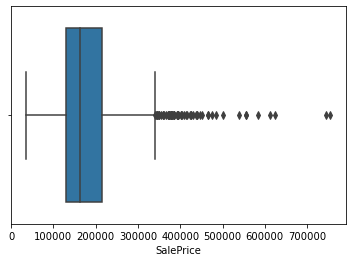

In [6]:
# Detecting outliers
sns.boxplot(x=dataset['SalePrice'])

<AxesSubplot:>

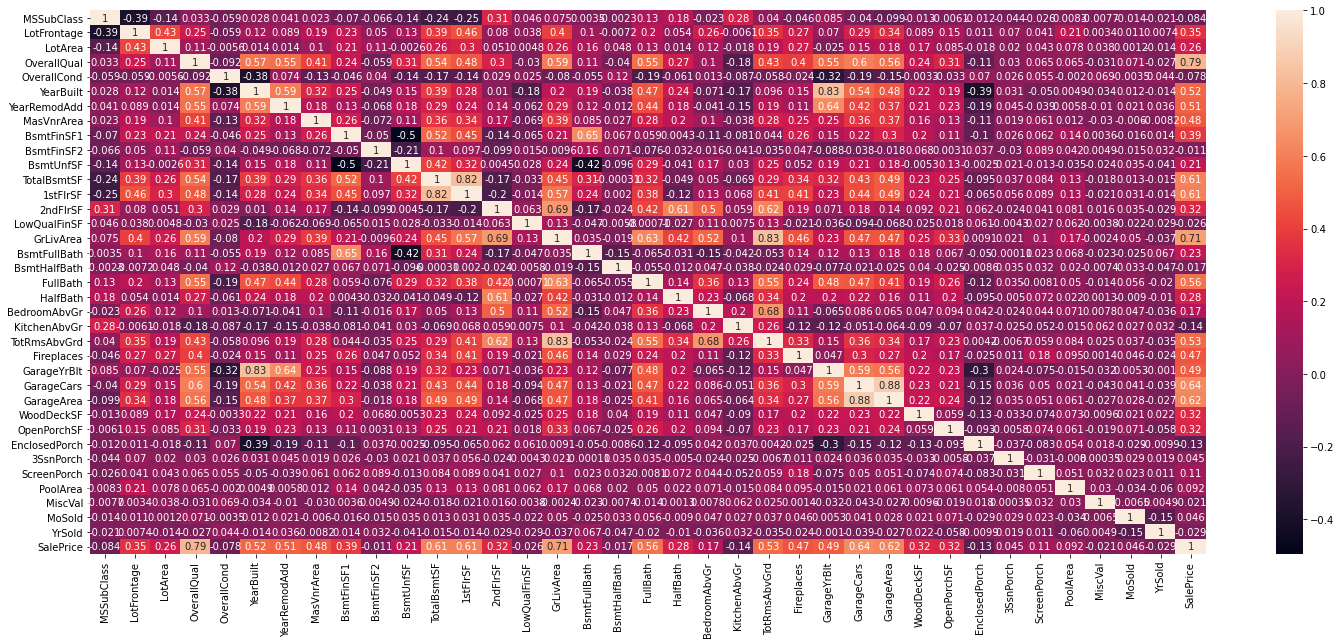

In [7]:
# Finding the relations between variables
plt.figure(figsize=(25,10))
c = dataset.corr()
sns.heatmap(c,annot=True)

Text(0, 0.5, 'SalePrice')

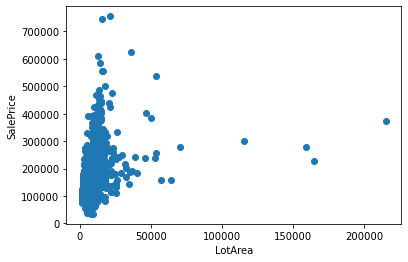

In [8]:
X1 = dataset['LotArea'].values
plt.scatter(X1,y)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

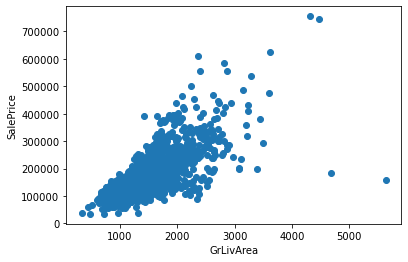

In [9]:
X1 = dataset['GrLivArea'].values
plt.scatter(X1,y)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### Preprocessing Features

In [10]:
# Examples of categorical features
dataset['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [11]:
# Handling categorical features
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
cols = X.columns
num_cols = X._get_numeric_data().columns
categorical_cols = list(set(cols) - set(num_cols))
X.loc[:,categorical_cols] = X.loc[:,categorical_cols].astype(str)
for cat_col in categorical_cols:
    ind_cat = X.columns.get_loc(cat_col)
    X.iloc[:,ind_cat] = labelencoder_X.fit_transform(X.iloc[:,ind_cat])

# Create our imputer to replace missing values with the mean
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X)
X = imp.transform(X)

In [12]:
# Print one row randomly
random_indices = np.random.choice(X.shape[0], size=1, replace=False)
# X[random_indices, :]
X[505, :]

array([9.000e+01, 4.000e+00, 6.000e+01, 7.596e+03, 1.000e+00, 0.000e+00,
       3.000e+00, 3.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.700e+01,
       0.000e+00, 2.000e+00, 2.000e+00, 5.000e+00, 5.000e+00, 5.000e+00,
       1.952e+03, 1.952e+03, 3.000e+00, 1.000e+00, 1.300e+01, 1.400e+01,
       1.000e+00, 3.600e+02, 3.000e+00, 4.000e+00, 1.000e+00, 3.000e+00,
       3.000e+00, 3.000e+00, 5.000e+00, 0.000e+00, 5.000e+00, 0.000e+00,
       9.600e+02, 9.600e+02, 1.000e+00, 2.000e+00, 1.000e+00, 4.000e+00,
       9.600e+02, 1.000e+03, 0.000e+00, 1.960e+03, 0.000e+00, 0.000e+00,
       2.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.000e+01,
       6.000e+00, 0.000e+00, 5.000e+00, 5.000e+00, 1.952e+03, 2.000e+00,
       2.000e+00, 4.000e+02, 4.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
       4.000e+00, 4.000e+00, 0.000e+00, 7.000e+00, 2.009e+03, 0.000e+00,
       4.000e+00])

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Save Test Set
np.savetxt("features_house_test.csv", X_test, delimiter=",")
np.savetxt("targets_house_test.csv", y_test, delimiter=",")

### Simple Linear Regression

In [14]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
simp_lin_reg = LinearRegression()

In [15]:
### Simple Linear Regression
# Only using one feature: "Above grade (ground) living area square feet"
X1_train = X_train[:,45]
X1_train = X1_train.reshape(-1, 1)
X1_test = X_test[:,45]
X1_test = X1_test.reshape(-1, 1)
simp_lin_reg.fit(X1_train, y_train)

LinearRegression()

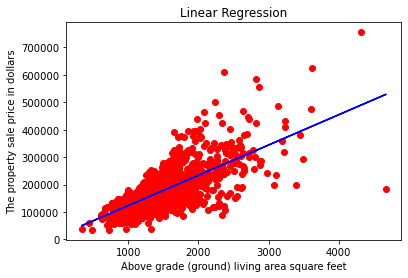

In [16]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X1_train, y_train, color='red')
    plt.plot(X1_train, simp_lin_reg.predict(X1_train), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Above grade (ground) living area square feet')
    plt.ylabel('The property sale price in dollars')
    plt.show()
    return
plt.figure()
viz_linear()

In [17]:
# Predicting a random new result 
import random
R_test = random.randrange(len(X_test))
Random_Test = X1_test[R_test].reshape(-1, 1)

# Predicting a new result with Linear Regression
y_pred1 = simp_lin_reg.predict(Random_Test)
print('Predicted sale price for sample %d:   %d' %(R_test,y_pred1))
print('True sale price for sample %d:        %d' %(R_test,y_test[R_test]))

Predicted sale price for sample 251:   227132
True sale price for sample 251:        266000


In [18]:
# Evaluation
from sklearn.metrics import r2_score
# proportion of the variance for a dependent variable that's explained by an independent variable.
y_pred = simp_lin_reg.predict(X1_test).astype('int64')
lin_reg_r2 = r2_score(y_test, y_pred)
print('\nSimple Linear Regression - R-Squared: %f' %lin_reg_r2)


Simple Linear Regression - R-Squared: 0.433264


### Multiple Linear Regression

In [19]:
### Multiple Linear Regression - using 10 randome features
import random
R10 = random.sample(range(0,X.shape[1]),10)
X10_train = X_train[:,R10]
X10_test = X_test[:,R10]
mult_lin_reg10 = LinearRegression()
mult_lin_reg10.fit(X10_train, y_train)

### Multiple Linear Regression - using all features
mult_lin_reg = LinearRegression()
mult_lin_reg.fit(X_train, y_train)
# Save Model
pickle.dump(mult_lin_reg, open('Model_MLR.pkl', 'wb'))

In [20]:
# Evaluation
from sklearn.metrics import r2_score
y_pred10 = mult_lin_reg10.predict(X10_test).astype('int64')
lin_reg_r2_10 = r2_score(y_test, y_pred10)
print('\nMultiple Linear Regression using 10 randome features - R-Squared: %f' %lin_reg_r2_10)

y_pred = mult_lin_reg.predict(X_test).astype('int64')
lin_reg_r2 = r2_score(y_test, y_pred)
print('\nMultiple Linear Regression using all features - R-Squared: %f' %lin_reg_r2)


Multiple Linear Regression using 10 randome features - R-Squared: 0.578254

Multiple Linear Regression using all features - R-Squared: 0.558798


### Polynomial Regression

In [21]:
#%% Polynomial Regression with 1 Feature for visualization
import random
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def viz_polymonial():
    plt.scatter(Xpv_train, ypv_train, color='red')
    plt.plot(Xpv_train, poly_pred, color='blue')
    plt.title('Polymonial Regression with 1 Feature for visualization')
    plt.xlabel('Linear feet of street connected to property')
    plt.ylabel('The property sale price in dollars')
    plt.show()
    return

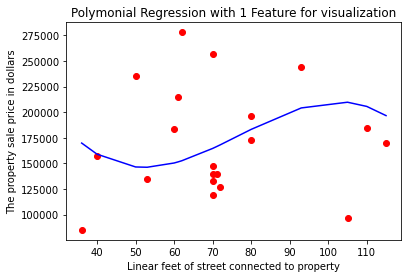

In [22]:
# Try with polynomial of degree 3
degree = 3

# 1 feature (Linear feet of street connected to property)
# with 20 random samples for visualization
Rp = random.sample(range(0,X_train.shape[0]),20)
ypv_train = y_train[Rp]
Xpv_train = X_train[Rp,2] # Column 2: LotFrontage
Xpv_train = Xpv_train.reshape(-1, 1)

# Standardizing features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler()
### Polynomial Regression - using one feature with 20 samples
polyreg_scaled = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(Xpv_train,ypv_train)

# Visualizing the Polymonial Regression results
poly_pred = polyreg_scaled.predict(Xpv_train)
zipped_pred = zip(Xpv_train, poly_pred)
sorted_pred = sorted(zipped_pred)
tuples = zip(*sorted_pred)
Xpv_train, poly_pred = [list(tuple) for tuple in tuples]

plt.figure()
viz_polymonial()

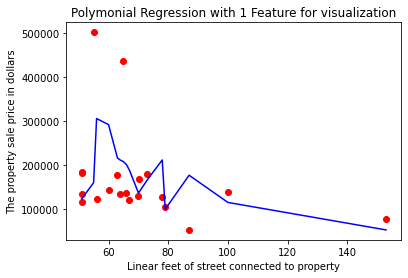

In [23]:
# Try with a different polynomial degree (overfitting)
degree = 10

# 1 feature (Linear feet of street connected to property)
# with 20 random samples for visualization
Rp = random.sample(range(0,X_train.shape[0]),20)
ypv_train = y_train[Rp]
Xpv_train = X_train[Rp,2]
Xpv_train = Xpv_train.reshape(-1, 1)

# Standardizing features by removing the mean and scaling to unit variance
scaler = preprocessing.StandardScaler()
### Polynomial Regression - using one feature with 20 samples
polyreg_scaled = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg_scaled.fit(Xpv_train,ypv_train)

# Visualizing the Polymonial Regression results
poly_pred = polyreg_scaled.predict(Xpv_train)
zipped_pred = zip(Xpv_train, poly_pred)
sorted_pred = sorted(zipped_pred)
tuples = zip(*sorted_pred)
Xpv_train, poly_pred = [list(tuple) for tuple in tuples]

plt.figure()
viz_polymonial()

### Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
# Save Model
pickle.dump(dt_reg, open('Model_DT.pkl', 'wb'))
# Evaluation
from sklearn.metrics import r2_score
y_pred = dt_reg.predict(X_test).astype('int64')
dt_reg_r2 = r2_score(y_test, y_pred)
print('\nDecision Tree Regression - R-Squared: %f' %dt_reg_r2)


Decision Tree Regression - R-Squared: 0.792213


### K-Nearest Neighbors Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
# Save Model
pickle.dump(knn_reg, open('Model_KNN.pkl', 'wb'))
# Evaluation
from sklearn.metrics import r2_score
y_pred = knn_reg.predict(X_test).astype('int64')
knn_reg_r2 = r2_score(y_test, y_pred)
print('\nK-Nearest Neighbors Regression - R-Squared: %f' %knn_reg_r2)


K-Nearest Neighbors Regression - R-Squared: 0.627151
